In [1]:
import pandas as pd
#import dash
#import dash_html_components as html
#import dash_core_components as dcc
#from dash.dependencies import Input, Output
import plotly.express as px

In [2]:
# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

In [68]:
max_payload

9600.0

In [69]:
min_payload

0.0

In [3]:
sites = spacex_df['Launch Site'].unique()

In [4]:
opts = [{'label': 'All Sites', 'value': 'ALL'}]
for site in sites: 
    opt = {}
    opt['label']=site
    opt['value']=site
    opts.append(opt)

In [5]:
opts

[{'label': 'All Sites', 'value': 'ALL'},
 {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
 {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
 {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
 {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}]

In [63]:
entered_site='ALL'
if entered_site == 'ALL':
    data = spacex_df
else:
    data = spacex_df[spacex_df['Launch Site']==entered_site]
data


,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.00,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.00,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.00,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.00,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.00,F9 v1.0 B0007,v1.0
5,5,7,CCAFS LC-40,0,3170.00,F9 v1.1,v1.1
6,6,8,CCAFS LC-40,0,3325.00,F9 v1.1,v1.1
7,7,9,CCAFS LC-40,0,2296.00,F9 v1.1,v1.1
8,8,10,CCAFS LC-40,0,1316.00,F9 v1.1,v1.1
9,9,11,CCAFS LC-40,0,4535.00,F9 v1.1,v1.1


In [67]:
class_num = data.groupby(['class']).value_counts({'Launch Site'}).reset_index(name='counts')
class_num.replace({0:"Failed", 1:"Success"}, inplace=True)
class_num

,class,Launch Site,counts
0,Failed,CCAFS LC-40,19
1,Failed,VAFB SLC-4E,6
2,Failed,CCAFS SLC-40,4
3,Failed,KSC LC-39A,3
4,Success,KSC LC-39A,10
5,Success,CCAFS LC-40,7
6,Success,VAFB SLC-4E,4
7,Success,CCAFS SLC-40,3


In [65]:
fig = px.pie(class_num, values='counts', names='class', title="Site:"+ entered_site, color_discrete_sequence=["red", "green"])

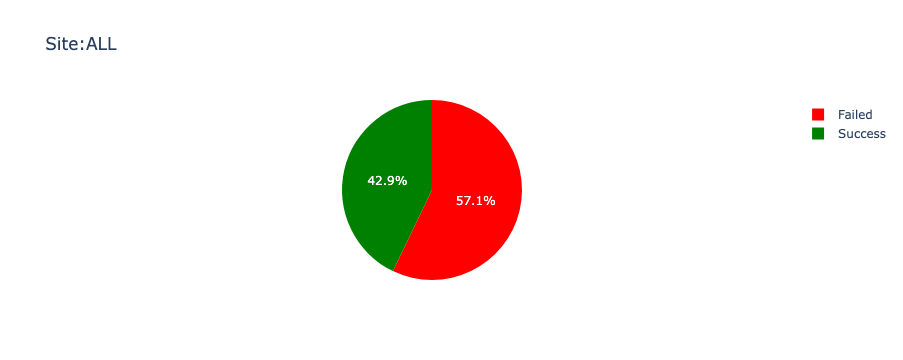

In [66]:
fig.show()